## Part 1: Loading and Exploring Multiple Datasets

Let's load two related datasets (e.g., education and health indicators).

In [2]:
import pandas as pd

# Load education budget analysis dataset (local file)
edu = pd.read_csv('../data/usa-education-budget-analysis.csv')

# Load pharmaceutical drug spending dataset (local file)
health = pd.read_csv('../data/pharmaceutical-drug-spending.csv')

print('Education:', edu.shape)
print('Health:', health.shape)

Education: (1944, 3)
Health: (1341, 6)


## Part 2: Exploring Structure and Cleaning

Check columns, data types, and handle missing values.

In [2]:
edu[edu['Name'] == 'Department of Education'].Year

270    1976
271    1977
272    1978
273    1979
274    1980
275    1981
276    1982
277    1983
278    1984
279    1985
280    1986
281    1987
282    1988
283    1989
284    1990
285    1991
286    1992
287    1993
288    1994
289    1995
290    1996
291    1997
292    1998
293    1999
294    2000
295    2001
296    2002
297    2003
298    2004
299    2005
300    2006
301    2007
302    2008
303    2009
304    2010
305    2011
306    2012
307    2013
308    2014
309    2015
310    2016
311    2017
312    2018
313    2019
314    2020
315    2021
316    2022
317    2023
318    2024
319    2025
320    2026
321    2027
322    2028
323    2029
Name: Year, dtype: int64

In [3]:
1976+len(edu[edu['Name'] == 'Department of Education'].Year) -1

2029

In [4]:
(pd.Series(range(1976, 2030)) == edu[edu['Name'] == 'Department of Education'].Year.unique()).mean()

np.float64(1.0)

In [3]:
%pip install plotly

/Users/anastasiiakulakova/repos/Practical-Data-Science-Course/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


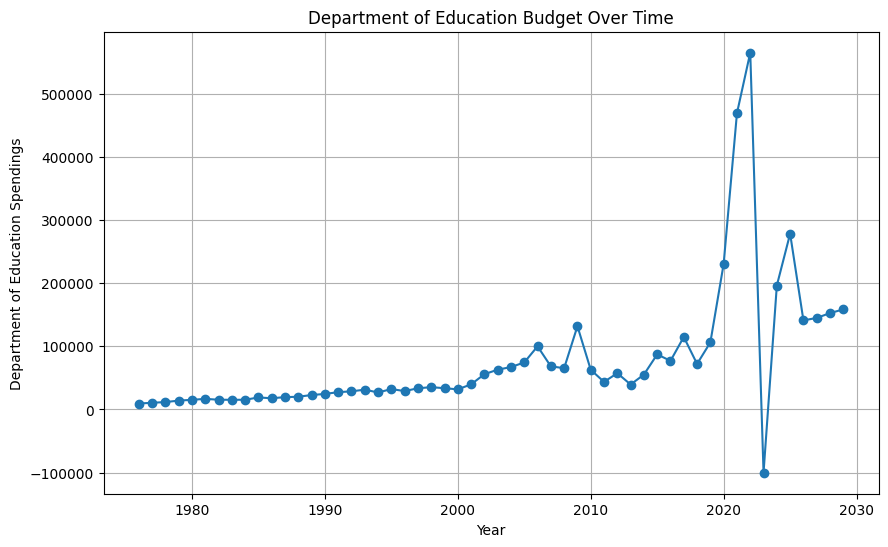

In [9]:
import matplotlib.pyplot as plt
dept_edu = edu[edu['Name'] == 'Department of Education'].copy()
dept_edu = dept_edu.rename(columns={'Value': 'dept_edu_spendings', 'Year': 'year'})
dept_edu = dept_edu.drop(columns=['Name'])
plt.figure(figsize=(10, 6))
plt.plot(dept_edu['year'], dept_edu['dept_edu_spendings'], marker='o')
plt.title('Department of Education Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Department of Education Spendings')
plt.grid(True)
plt.show()

In [25]:
import plotly.express as px

px.line(dept_edu, x='year', y='dept_edu_spendings', 
              title='Department of Education Budget Over Time',
              labels={'year': 'Year', 'dept_edu_spendings': 'Spendings'},
              markers=True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Year=%{x}<br>Spendings=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('uAe5B7oHuwe8B70Hvge/B8AHwQfCB8' ... 'fjB+QH5QfmB+cH6AfpB+oH6wfsB+0H'),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAxwkAAAAAAAKTEQAAAAACAtM' ... 'AAAEC0AUEAAAAAUKMCQQAAAAC4WgNB'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Department of Education Budget Over Time'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Spendings'}}}
})

In [10]:
dept_edu

,year,dept_edu_spendings
270,1976,9314.0
271,1977,10568.0
272,1978,11625.0
273,1979,13996.0
274,1980,15209.0
275,1981,16752.0
276,1982,15374.0
277,1983,15267.0
278,1984,15336.0
279,1985,18952.0


TODO: fact-check negative value and value over 500000

In [20]:
# Prepare health_usa DataFrame: drop LOCATION, rename TIME to year, lowercase other columns (inplace)
health_usa = health[health['LOCATION'] == 'USA'].copy()
health_usa.drop(columns=['LOCATION'], inplace=True)
health_usa.rename(columns={'TIME': 'year'}, inplace=True)
health_usa.columns = [col.lower() for col in health_usa.columns]
health_usa

,year,pc_healthxp,pc_gdp,usd_cap,total_spend
1306,1987,8.695,0.857,171.834,41633.49
1307,1988,8.634,0.885,189.545,46343.56
1308,1989,8.650,0.918,209.722,51763.37
1309,1990,8.771,0.986,235.469,58778.48
1310,1991,8.668,1.033,251.462,63615.11
1311,1992,8.306,1.013,257.468,66044.15
1312,1993,8.079,1.006,265.437,68992.12
1313,1994,8.065,0.999,276.718,72811.70
1314,1995,8.393,1.049,300.923,80129.17
1315,1996,8.858,1.104,330.937,89152.44


In [21]:
health_usa

,year,pc_healthxp,pc_gdp,usd_cap,total_spend
1306,1987,8.695,0.857,171.834,41633.49
1307,1988,8.634,0.885,189.545,46343.56
1308,1989,8.650,0.918,209.722,51763.37
1309,1990,8.771,0.986,235.469,58778.48
1310,1991,8.668,1.033,251.462,63615.11
1311,1992,8.306,1.013,257.468,66044.15
1312,1993,8.079,1.006,265.437,68992.12
1313,1994,8.065,0.999,276.718,72811.70
1314,1995,8.393,1.049,300.923,80129.17
1315,1996,8.858,1.104,330.937,89152.44


In [17]:
# data preprocessing
dept_edu.columns

Index(['year', 'dept_edu_spendings'], dtype='object')

## Part 3: Joining, Merging, and Concatenating

Combine datasets to enrich your analysis.

In [23]:
# Merge on country and year
merged = pd.merge(dept_edu, health_usa, on=['year'], how='inner')
print('Merged shape:', merged.shape)
merged

Merged shape: (35, 6)


,year,dept_edu_spendings,pc_healthxp,pc_gdp,usd_cap,total_spend
0,1987,19475.0,8.695,0.857,171.834,41633.49
1,1988,20098.0,8.634,0.885,189.545,46343.56
2,1989,22819.0,8.650,0.918,209.722,51763.37
3,1990,24549.0,8.771,0.986,235.469,58778.48
4,1991,27360.0,8.668,1.033,251.462,63615.11
5,1992,28685.0,8.306,1.013,257.468,66044.15
6,1993,31324.0,8.079,1.006,265.437,68992.12
7,1994,26881.0,8.065,0.999,276.718,72811.70
8,1995,32245.0,8.393,1.049,300.923,80129.17
9,1996,29097.0,8.858,1.104,330.937,89152.44


## Part 4: Working with Time Series

Parse dates, resample, and analyze trends.

In [ ]:
# Plot Department of Education spendings and total pharmaceutical spendings using plotly
import plotly.express as px
px.line(merged, x='year', y=['dept_edu_spendings', 'total_spend'],
              title='Department of Education vs Total Pharmaceutical Spendings',
              labels={'year': 'Year', 'value': 'Spendings'},
              markers=True)
# fig.update_traces(mode='lines+markers')
# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=dept_edu_spendings<br>Year=%{x}<br>Spendings=%{y}<extra></extra>',
              'legendgroup': 'dept_edu_spendings',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': 'dept_edu_spendings',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('wwfEB8UHxgfHB8gHyQfKB8sHzAfNB8' ... 'fcB90H3gffB+AH4QfiB+MH5AflBw=='),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAMAE00AAAAAAgKDTQAAAAADASN' ... 'BQ8/lAAAAAAPAqDEEAAAAAZKccQQ=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=total_pharma_spendings<br>Year=%{x}<br>Spendings=%{y}<extra></extra>',
              'legendgroup': 'total_pharma_spendings',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': 'total_pharma_spendings',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('wwfEB8UHxgfHB8gHyQfKB8sHzAfNB8' ... 'fcB90H3gffB+AH4QfiB+MH5AflBw=='),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('4XoUri9U5EC4HoXr8aDmQHE9CtdrRu' ... 'BflxlBKVyPwvicGkFcj8L1MgcdQQ=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Department of Education vs Total Pharmaceutical Spendings'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Spendings'}}}
})

## Part 5: GroupBy and Aggregation

Summarize data by region, country, or other groups.

In [33]:
merged.dtypes

year                        int64
dept_edu_spendings        float64
pc_healthxp               float64
pc_gdp                    float64
usd_cap                   float64
total_pharma_spendings    float64
dtype: object

In [34]:
# Resample into 4-year periods and calculate edu_vs_pharma ratio
merged['date'] = pd.to_datetime(merged['year'], format='%Y')
resampled = merged.set_index('date').resample('4YS').sum(numeric_only=True)
resampled['edu_vs_pharma'] = resampled['dept_edu_spendings'] / resampled['total_pharma_spendings']
resampled = resampled.reset_index()

resampled

,date,year,dept_edu_spendings,pc_healthxp,pc_gdp,usd_cap,total_pharma_spendings,edu_vs_pharma
0,1987-01-01,7954,86941.0,34.750,3.646,806.570,198518.90,0.437948
1,1991-01-01,7970,114250.0,33.118,4.051,1051.085,271463.08,0.420868
2,1995-01-01,7986,130159.0,36.517,4.535,1398.357,379559.32,0.342921
3,1999-01-01,8002,161031.0,46.617,6.073,2222.953,630991.91,0.255203
4,2003-01-01,8018,304657.0,51.451,7.505,3223.824,949223.85,0.320954
5,2007-01-01,8034,328466.0,51.304,8.016,3856.269,1177795.15,0.278882
6,2011-01-01,8050,195781.0,49.074,7.908,4157.180,1309812.76,0.149473
7,2015-01-01,8066,351193.0,48.690,8.116,4811.773,1558865.27,0.225288
8,2019-01-01,6060,806508.0,34.547,6.070,4024.559,1330914.79,0.605980


In [35]:
# Plot resampled data up to year 2015 inclusive
resampled_2015 = resampled[resampled['date'].dt.year <= 2015]

px.line(resampled_2015, x='date', y='edu_vs_pharma',
              title='Ratio of Department of Education Spendings to Total Pharmaceutical Spendings (4-Year Periods, Up to 2015)',
              labels={'date': 'Period Start', 'edu_vs_pharma': 'Education/Pharma Ratio'},
              markers=True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Period Start=%{x}<br>Education/Pharma Ratio=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['1987-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
                          '1995-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
                          '2003-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
                          '2011-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('P4aO/lcH3D/iC0htfu/aP1/Wn3Ns8t' ... 'w02dE/TPCgSeohwz+1Q+FHOdbMPw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': ('Ratio of Department of Educati' ... 's (4-Year Periods, Up to 2015)')},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Period Start'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Education/Pharma Ratio'}}}
})